![imagen](../Data/imagen.jpg)

<center><H2>ANÁLISIS EXPLORATORIO DE DATOS<H2></center>

Importo librerias:

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [11]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
!pip install pandas --upgrade

ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'C:\\Users\\feder\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\~-ndas.libs\\msvcp140-fa0758dedafbbe194d3ee96e3dc2b9a3.dll'

     -------------------------------------- 10.6/10.6 MB 936.2 kB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.3
    Uninstalling pandas-2.1.3:
      Successfully uninstalled pandas-2.1.3



Consider using the `--user` option or check the permissions.


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


| Abreviatura DataSet | Archivo CSV |
| --------- | --------- |
| edc | EDA_estadisticas_deportivas_clubes |
| vec | EDA_valuacion_economica_clubes |
| tj | EDA_transferencias_jugadores |

**CARGA Y LIMPIEZA DE DATASETS**

<h4>DataSet "edc"

In [13]:
edc = pd.read_csv("../Data/EDA_estadisticas_deportivas_clubes.csv")

Dimensiones del DataFrame:

In [14]:
edc.shape
# 98 filas y 10 columnas

(98, 11)

In [15]:
edc.head()

,Unnamed: 0,equipo,liga,goles,tiros_porteria,t_amarillas,t_rojas,posesion_%,pases_%,duelos_aereos_ganados,valor_gral_eq
0,0,Manchester City,Premier League,83,15.8,46,2,60.8,89.4,12.8,7.01
1,1,Bayern Munich,Bundesliga,50,17.1,44,3,58.1,85.5,12.9,6.95
2,2,Paris Saint-Germain,Ligue 1,86,15.0,73,7,60.1,89.5,9.5,6.88
3,3,Barcelona,LaLiga,85,15.3,68,2,62.4,89.7,10.6,6.87
4,4,Real Madrid,LaLiga,67,14.4,57,2,57.7,87.7,11.8,6.86


In [16]:
edc.tail()

,Unnamed: 0,equipo,liga,goles,tiros_porteria,t_amarillas,t_rojas,posesion_%,pases_%,duelos_aereos_ganados,valor_gral_eq
93,93,Sheffield United,Premier League,20,8.5,73,3,43.0,76.9,19.1,6.46
94,94,Crotone,Serie A,45,9.5,85,4,47.2,80.4,12.7,6.43
95,95,Benevento,Serie A,40,11.0,90,5,44.2,77.7,13.4,6.43
96,96,Dijon,Ligue 1,25,9.2,75,5,46.9,80.0,14.3,6.42
97,97,Schalke 04,Bundesliga,25,8.9,70,2,46.2,76.5,15.6,6.41


Tipo de datos de cada columna:

In [17]:
edc.dtypes

Unnamed: 0                 int64
equipo                    object
liga                      object
goles                      int64
tiros_porteria           float64
t_amarillas                int64
t_rojas                    int64
posesion_%               float64
pases_%                  float64
duelos_aereos_ganados    float64
valor_gral_eq            float64
dtype: object

Aquí ya veo el nombre de todas las columnas. También podría solicitarlo con **edc.columns**  

In [18]:
# Convierto los nombres de las columnas a minúscula:
edc.columns.str.lower()

Index(['unnamed: 0', 'equipo', 'liga', 'goles', 'tiros_porteria',
       't_amarillas', 't_rojas', 'posesion_%', 'pases_%',
       'duelos_aereos_ganados', 'valor_gral_eq'],
      dtype='object')

In [19]:
# Renombro las columnas
edc.rename(columns={'Team': 'equipo', 'Tournament': 'liga','Goals': 'goles', 'Shots pg': 'tiros_porteria',
                    'yellow_cards': 't_amarillas', 'red_cards': 't_rojas', 'Possession%': 'posesion_%',
                      'Pass%': 'pases_%', 'AerialsWon': 'duelos_aereos_ganados', 'Rating': 'valor_gral_eq'}
                      , inplace=True)


In [20]:
edc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             98 non-null     int64  
 1   equipo                 98 non-null     object 
 2   liga                   98 non-null     object 
 3   goles                  98 non-null     int64  
 4   tiros_porteria         98 non-null     float64
 5   t_amarillas            98 non-null     int64  
 6   t_rojas                98 non-null     int64  
 7   posesion_%             98 non-null     float64
 8   pases_%                98 non-null     float64
 9   duelos_aereos_ganados  98 non-null     float64
 10  valor_gral_eq          98 non-null     float64
dtypes: float64(5), int64(4), object(2)
memory usage: 8.6+ KB


El DataFrame no tiene valores Nulos.  
Si tuviese podría aplicar **value_counts** que me muestra la cantidad de valores iguales que tiene determinada columna y si le agregase **dropna=False** me mostraría la cantidad de valores nulos.

In [21]:
# Parámetros estadísticos de las variables tipo "object":
edc.describe(include=object)

,equipo,liga
count,98,98
unique,98,5
top,Manchester City,Premier League
freq,1,20


Mediante un Histograma se puede ver si las variables/columnas tienden a una distribución normal

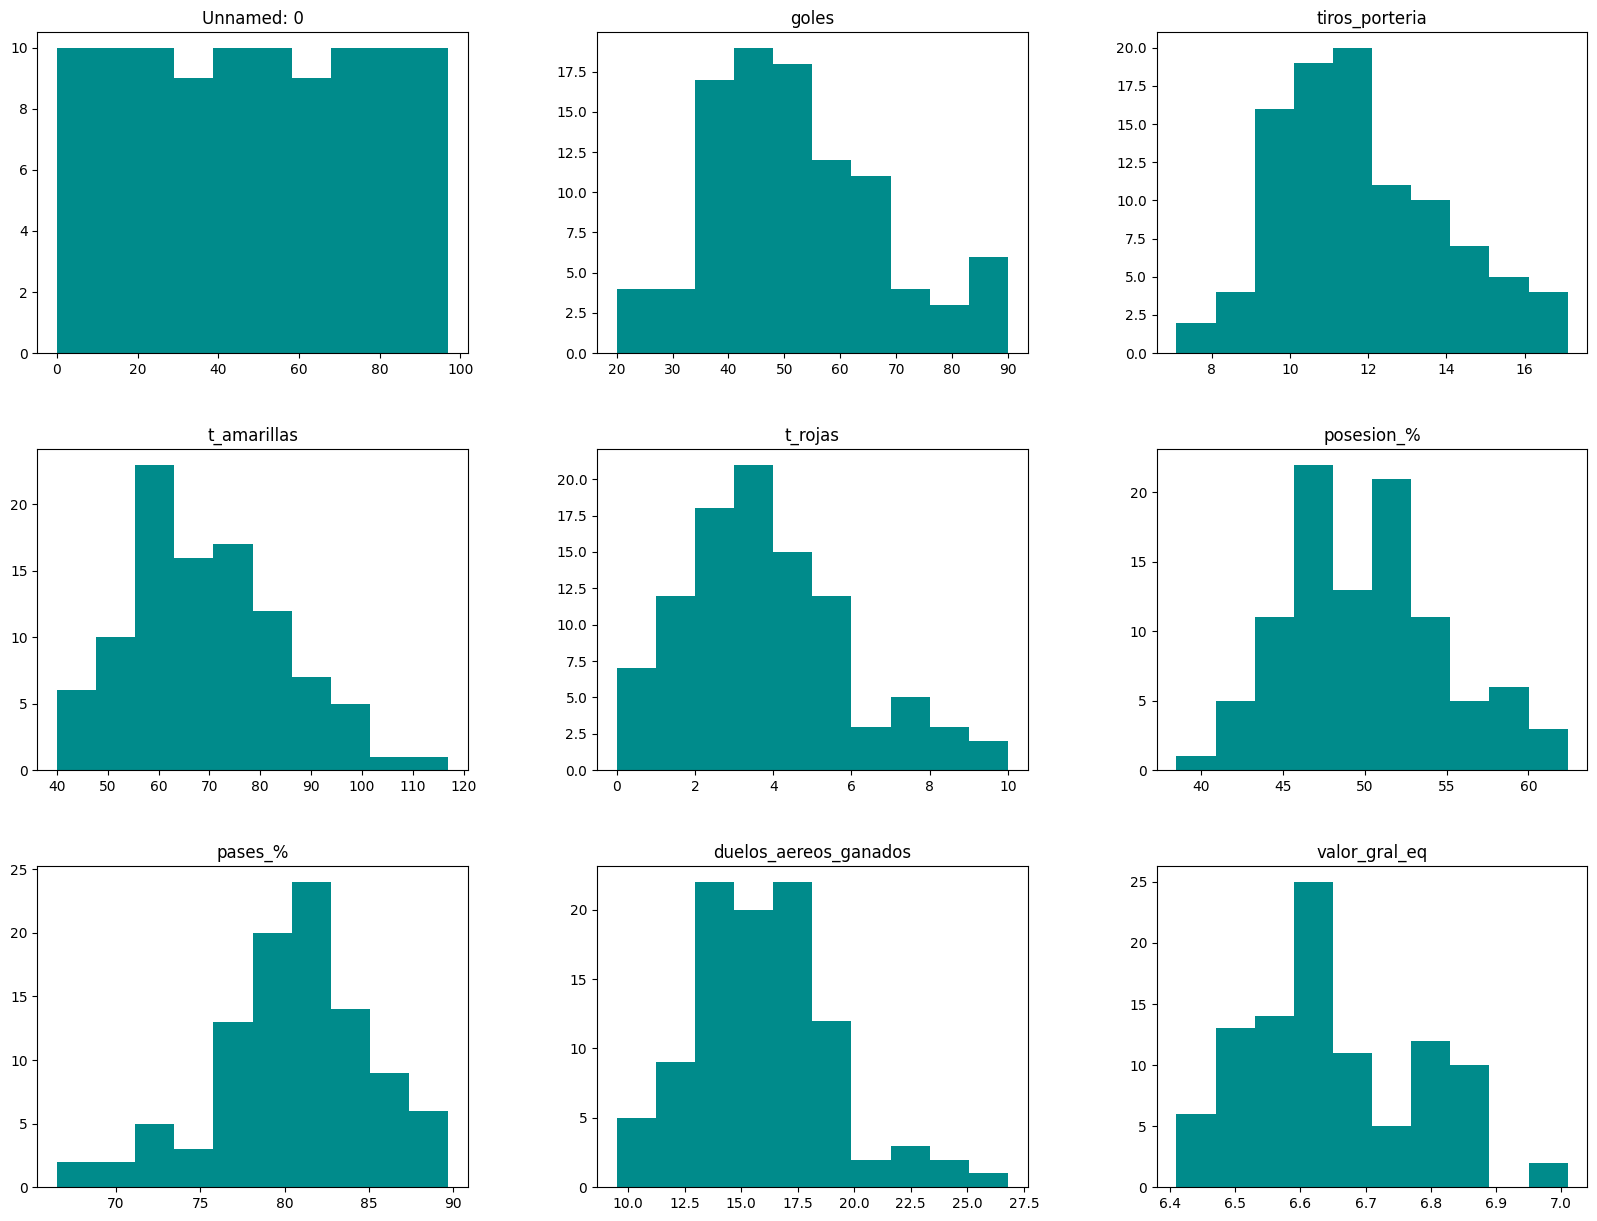

In [22]:
azul = "#008B8B"
edc.hist(figsize=(20,15), grid=False, color=azul);

 Para un análisis entre columnas, divido los datos del DATASET en rendimiento deportivo positivo y negativo de acuerdo a las columnas que   tiene para luego vincularlo con la columna "valor_gral_eq", la cual dejo en ambos DataFrame.  

- Rendimiento deportivo positivo:  
Columnas: ["goles", "tiros_porteria", "posesion_%", "pases_%", "duelos_aereos_ganados"]
  
 -Hipótesis Nula (Ho): "el rendimiento deportivo positivo mas alto de los equipos no implica una mayor   valoracion economica de los mismos".  
 -Hipótesis Alternativa (H1): "el rendimiento deportivo positivo mas alto de los equipos influye significativamente en la valoracion economica de los mismos".

- Rendimiento deportivo negativo:  
Columnas: ["t_amarillas", "t_rojas"]  

 -Hipótesis Nula (Ho): "el rendimiento deportivo negativo mas alto de los equipos no implica una menor  valoracion economica de los mismos".  
 -Hipótesis Alternativa (H1): "el rendimiento deportivo negativo mas alto de los equipos influye significativamente en la valoracion economica de los mismos".

Descripción de parámetros estadísticos:

In [23]:
edc.describe()

,Unnamed: 0,goles,tiros_porteria,t_amarillas,t_rojas,posesion_%,pases_%,duelos_aereos_ganados,valor_gral_eq
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,48.500000,51.683673,11.851020,69.704082,3.336735,49.995918,80.441837,16.006122,6.646122
std,28.434134,15.737274,2.149718,15.137316,2.148814,4.890068,4.690172,3.078955,0.132148
min,0.000000,20.000000,7.100000,40.000000,0.000000,38.500000,66.500000,9.500000,6.410000
25%,24.250000,40.250000,10.325000,60.000000,2.000000,46.225000,78.025000,14.025000,6.540000
50%,48.500000,50.000000,11.450000,67.500000,3.000000,49.750000,80.800000,16.100000,6.630000
75%,72.750000,61.000000,13.350000,80.000000,4.750000,52.850000,83.450000,17.850000,6.730000
max,97.000000,90.000000,17.100000,117.000000,10.000000,62.400000,89.700000,26.800000,7.010000


Correlación entre las variables:

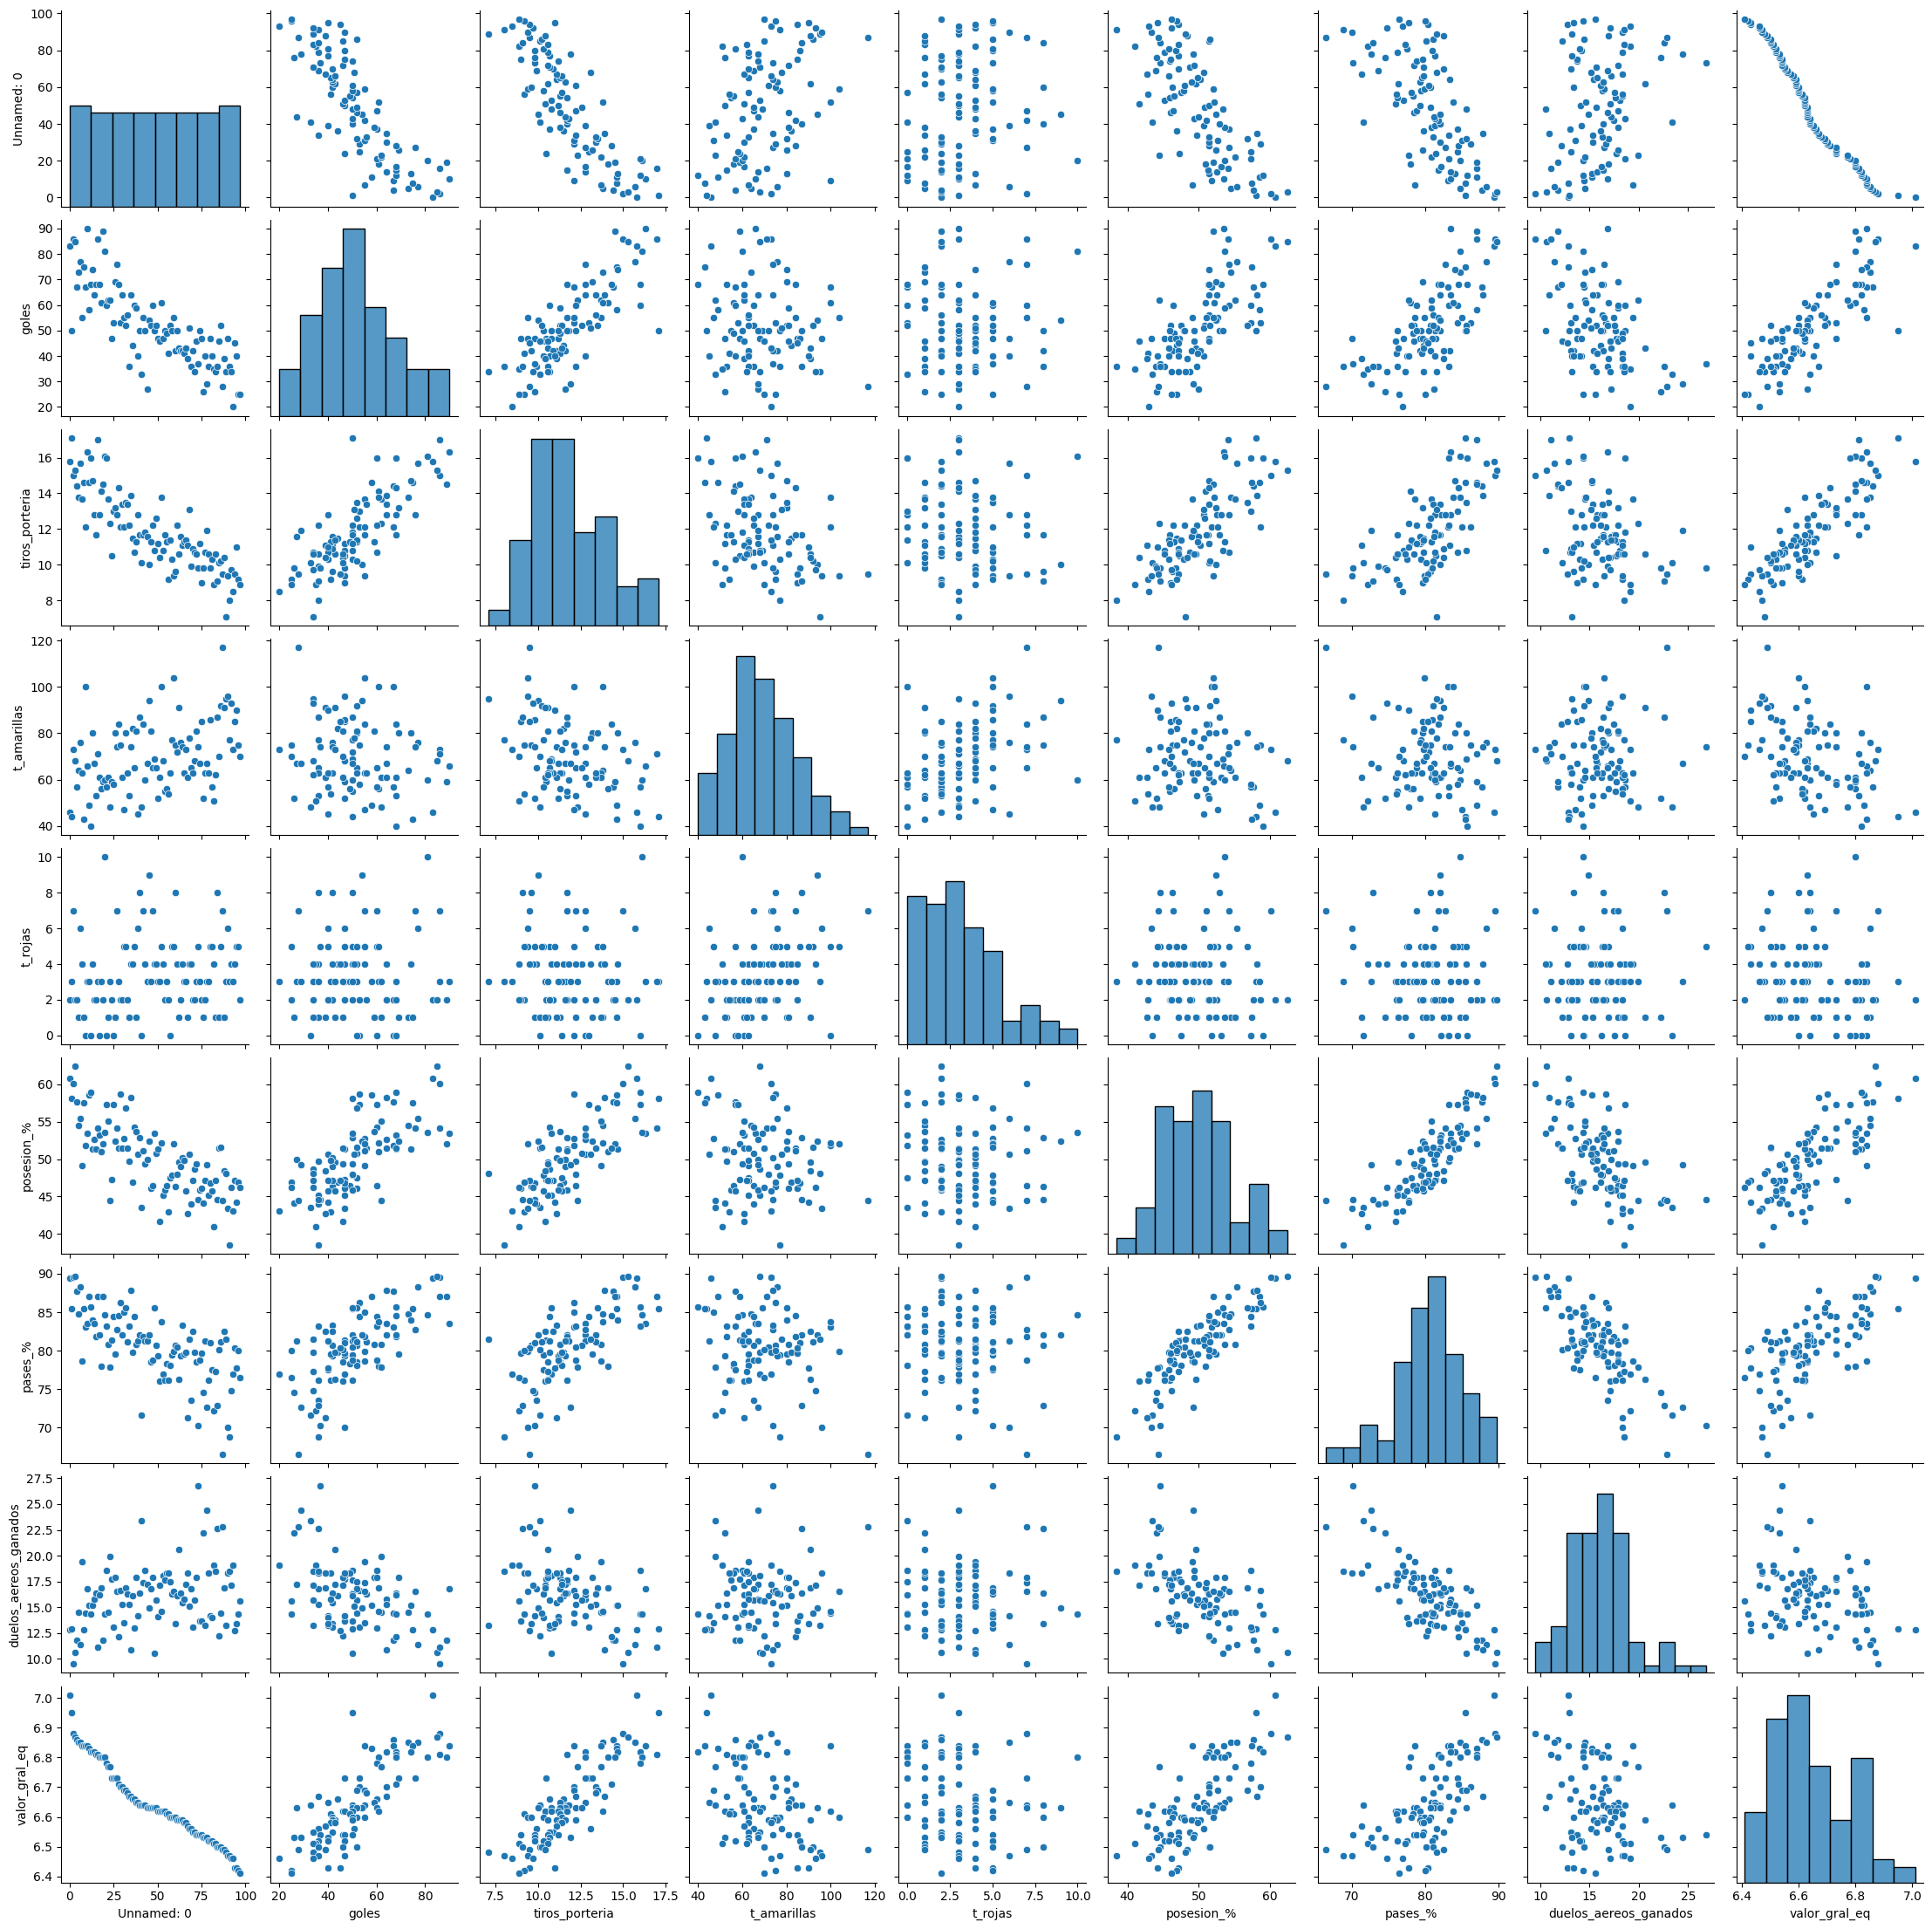

In [24]:
sns.pairplot(edc);

In [25]:
dataframe_numerico = edc.iloc[:,2:]
dataframe_numerico

,liga,goles,tiros_porteria,t_amarillas,t_rojas,posesion_%,pases_%,duelos_aereos_ganados,valor_gral_eq
0,Premier League,83,15.8,46,2,60.8,89.4,12.8,7.01
1,Bundesliga,50,17.1,44,3,58.1,85.5,12.9,6.95
2,Ligue 1,86,15.0,73,7,60.1,89.5,9.5,6.88
3,LaLiga,85,15.3,68,2,62.4,89.7,10.6,6.87
4,LaLiga,67,14.4,57,2,57.7,87.7,11.8,6.86
...,...,...,...,...,...,...,...,...,...
93,Premier League,20,8.5,73,3,43.0,76.9,19.1,6.46
94,Serie A,45,9.5,85,4,47.2,80.4,12.7,6.43
95,Serie A,40,11.0,90,5,44.2,77.7,13.4,6.43
96,Ligue 1,25,9.2,75,5,46.9,80.0,14.3,6.42


In [26]:
dataframe_numerico.corr()

ValueError: could not convert string to float: 'Premier League'

El Heatmap muestra de una manera muy clara la matriz de correlación:

In [30]:
plt.figure(figsize=(12,9))
sns.heatmap(dataframe_numerico.corr(),
           vmin=-1,vmax=1,annot=True,linewidths=0.5,cmap="blues");

ValueError: could not convert string to float: 'Premier League'

<Figure size 1200x900 with 0 Axes>

Como se observa en el grafico anterior existe un mayor grado de correlación entre ciertas variables.  
Se podría a priori decir que, aunque no sea la causa, sí existe un comportamiento similar entre los datos  
de "goles" y "tiros_porteria" (ambos 0.85) con la variable "valor_gral_eq"; y en menor medida, "posesion_%" (0.73) y "pases_%" (0.67) con la misma variable "valor_gral_eq".
Las restantes columnas ("t_amarillas", "t_rojas" y "duelos_aereos_ganados") tienen un grado de correlacion  muy bajo.

A continuación se se muestra la grafica de displot para revisar si existen outliers en el DataFrame y observar la dispersion de los datos.

C:\Users\feder\AppData\Local\Temp\ipykernel_17820\666837178.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(edc[0:8], hist = False)


<Axes: ylabel='Density'>

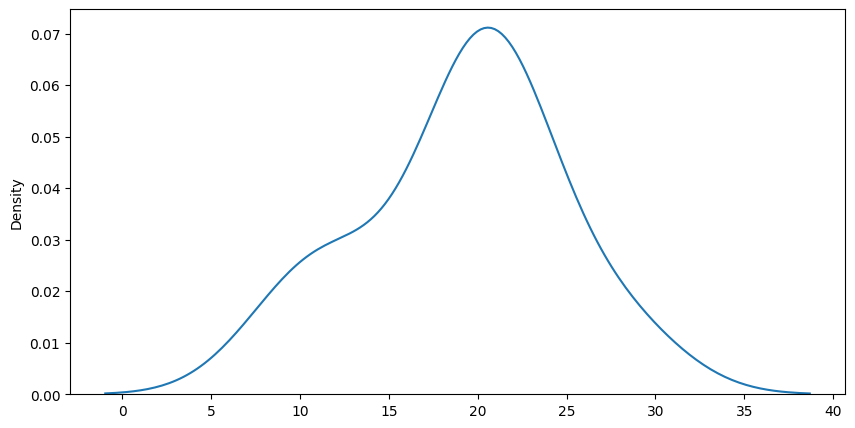

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(edc[0:8], hist = False)

La distribución tiende a ser normal y la gráfica leptocúrtica. Existen pocos valores Outliers, que puedo reemplazar por la media para darle mayor claridad y visibilidad a la gráfica.

In [ ]:
'''
parametro = 1.5
edc_numericas = edc.select_dtypes(include=['float', 'int'])

# Crear una copia del DataFrame para evitar modificar el original
df_features_numericas_sin_outliers = edc_numericas.copy()

for col in edc_numericas.columns:
    media = edc_numericas[col].mean()
    std_dev = edc_numericas[col].std()
    
    # Filtrar los outliers utilizando el parámetro y la desviación estándar
    mask = abs(edc_numericas[col] - media) > parametro * std_dev
    df_features_numericas_sin_outliers.loc[mask, col] = media

# Dibujar histogramas de las columnas sin outliers
df_features_numericas_sin_outliers.hist(figsize=(15, 20), grid=False)
plt.show()
'''

AttributeError: 'numpy.ndarray' object has no attribute 'select_dtypes'

<Axes: >

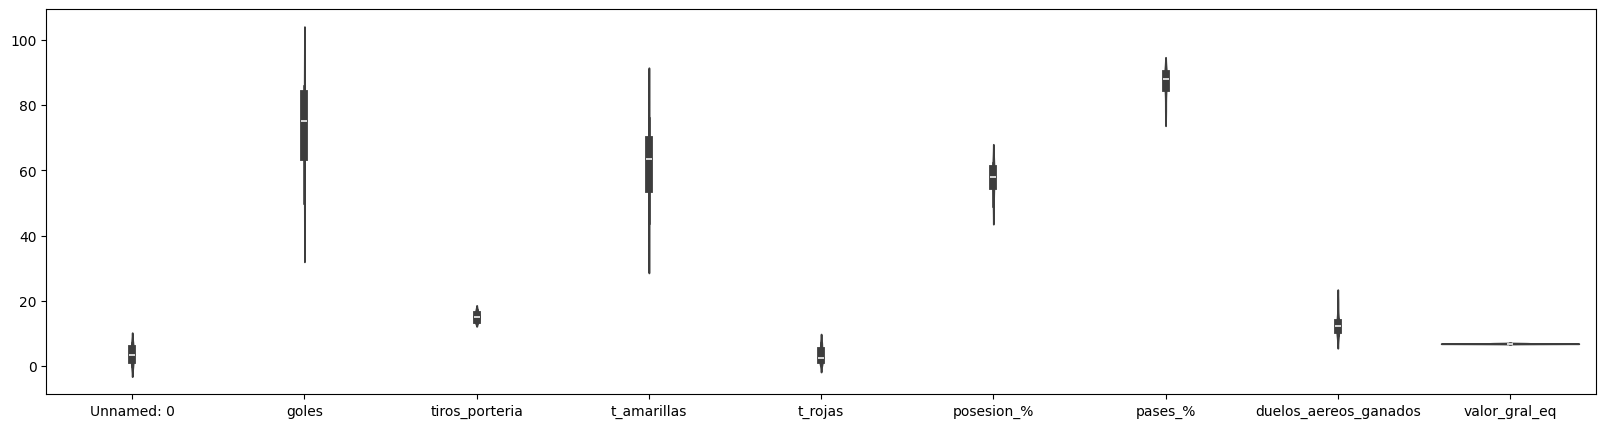

In [28]:
plt.figure(figsize=(20,5))
sns.violinplot(edc[0:8], color='blue', orient='v')

C:\Users\feder\AppData\Local\Temp\ipykernel_129580\941016633.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(edc, shade=True, color='blue', label='Densidad de probabilidad')


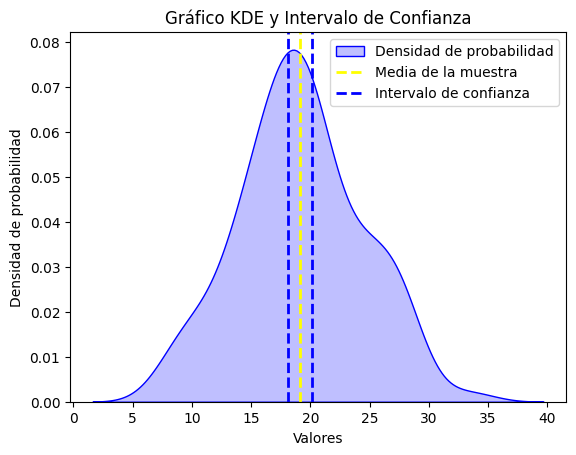

In [29]:
np.random.seed(14)
edc = np.random.normal(loc=20, scale=5, size=100)

# Intervalo de confianza para la media (95%):
intervalo_confianza = stats.norm.interval(0.95, loc=np.mean(edc), scale=stats.sem(edc))

# Gráfico KDE de los datos
sns.kdeplot(edc, shade=True, color='blue', label='Densidad de probabilidad')

media = np.mean(edc)
plt.axvline(media, color='yellow', linestyle='dashed', linewidth=2, label='Media de la muestra')
plt.axvline(intervalo_confianza[0], color='blue', linestyle='dashed', linewidth=2, label='Intervalo de confianza')
plt.axvline(intervalo_confianza[1], color='blue', linestyle='dashed', linewidth=2)

plt.xlabel('Valores')
plt.ylabel('Densidad de probabilidad')
plt.title('Gráfico KDE y Intervalo de Confianza')
plt.legend()

plt.show()

In [ ]:
#fig, axs = plt.subplots(ncols=5, figsize=(15, 5))

#sns.regplot(x=edc["goles"], y=edc["valor_gral_eq"], data=edc, ax=axs[0])
#sns.regplot(x=edc["tiros_porteria"], y=edc["valor_gral_eq"], data=edc, ax=axs[1])
#sns.regplot(x=edc["posesion_%"], y=edc["valor_gral_eq"], data=edc, ax=axs[2])
#sns.regplot(x=edc["pases_%"], y=edc["valor_gral_eq"], data=edc, ax=axs[3])
#sns.regplot(x=edc["duelos_aereos_ganados"], y=edc["valor_gral_eq"], data=edc, ax=axs[4]);

---------------------------------------------------------------
De aquí en adelante es lo mismo pero con los otros dos DataSets, aún incompleto.  


---------------------------------------------------------------

<h4>DataSet "vec"

In [ ]:
vec = pd.read_csv("../Data/EDA_valuacion_economica_clubes.csv")
vec.head()

,Unnamed: 0,Club Name,Competition Name,Squad Size,Average Age Of Players,Market Value Of Club In Millions(£),Average Market Value Of Players In Millions(£),Market Value Of Top 18 Players In Millions(£)
0,0,Manchester City,Premier League,24,27.1,970.02,40.42,920.70
1,1,Paris Saint-Germain,Ligue 1,36,26.1,891.18,24.76,801.00
2,2,Manchester United,Premier League,29,27.9,820.13,28.28,742.50
3,3,Chelsea FC,Premier League,27,26.9,802.35,29.72,737.10
4,4,Liverpool FC,Premier League,27,27.2,779.85,28.88,715.95


In [ ]:
vec.tail()

,Unnamed: 0,Club Name,Competition Name,Squad Size,Average Age Of Players,Market Value Of Club In Millions(£),Average Market Value Of Players In Millions(£),Market Value Of Top 18 Players In Millions(£)
95,95,Levante UD,LaLiga,27,28.1,89.19,3.30,82.35
96,96,FC Metz,Ligue 1,29,25.3,89.19,3.08,79.74
97,97,Clube Atlético Mineiro,Série A,29,27.5,88.61,3.06,76.46
98,98,Lokomotiv Moscow,Premier Liga,29,25.0,87.32,3.01,77.85
99,99,Genoa CFC,Serie A,34,27.6,86.94,2.56,72.27


In [ ]:
vec.dtypes

Unnamed: 0                                          int64
Club Name                                          object
Competition Name                                   object
Squad Size                                          int64
Average Age Of Players                            float64
Market Value Of Club In Millions(£)               float64
Average Market Value Of Players In Millions(£)    float64
Market Value Of Top 18 Players In Millions(£)     float64
dtype: object

In [ ]:
vec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Unnamed: 0                                      100 non-null    int64  
 1   Club Name                                       100 non-null    object 
 2   Competition Name                                100 non-null    object 
 3   Squad Size                                      100 non-null    int64  
 4   Average Age Of Players                          100 non-null    float64
 5   Market Value Of Club In Millions(£)             100 non-null    float64
 6   Average Market Value Of Players In Millions(£)  100 non-null    float64
 7   Market Value Of Top 18 Players In Millions(£)   100 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 6.4+ KB


In [ ]:
vec.describe()

,Unnamed: 0,Squad Size,Average Age Of Players,Market Value Of Club In Millions(£),Average Market Value Of Players In Millions(£),Market Value Of Top 18 Players In Millions(£)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,27.740000,26.368000,263.793800,9.682600,243.451700
std,29.011492,2.812742,1.417701,205.457212,7.747373,190.344411
min,0.000000,22.000000,23.000000,86.940000,2.560000,72.270000
25%,24.750000,26.000000,25.575000,114.147500,4.127500,105.795000
50%,49.500000,27.000000,26.200000,182.060000,7.045000,170.550000
75%,74.250000,29.000000,27.500000,345.622500,12.980000,321.412500
max,99.000000,36.000000,30.100000,970.020000,40.420000,920.700000


In [ ]:
vec.shape

(100, 8)

In [ ]:
vec.columns

Index(['Unnamed: 0', 'Club Name', 'Competition Name', 'Squad Size',
       'Average Age Of Players', 'Market Value Of Club In Millions(£)',
       'Average Market Value Of Players In Millions(£)',
       'Market Value Of Top 18 Players In Millions(£)'],
      dtype='object')

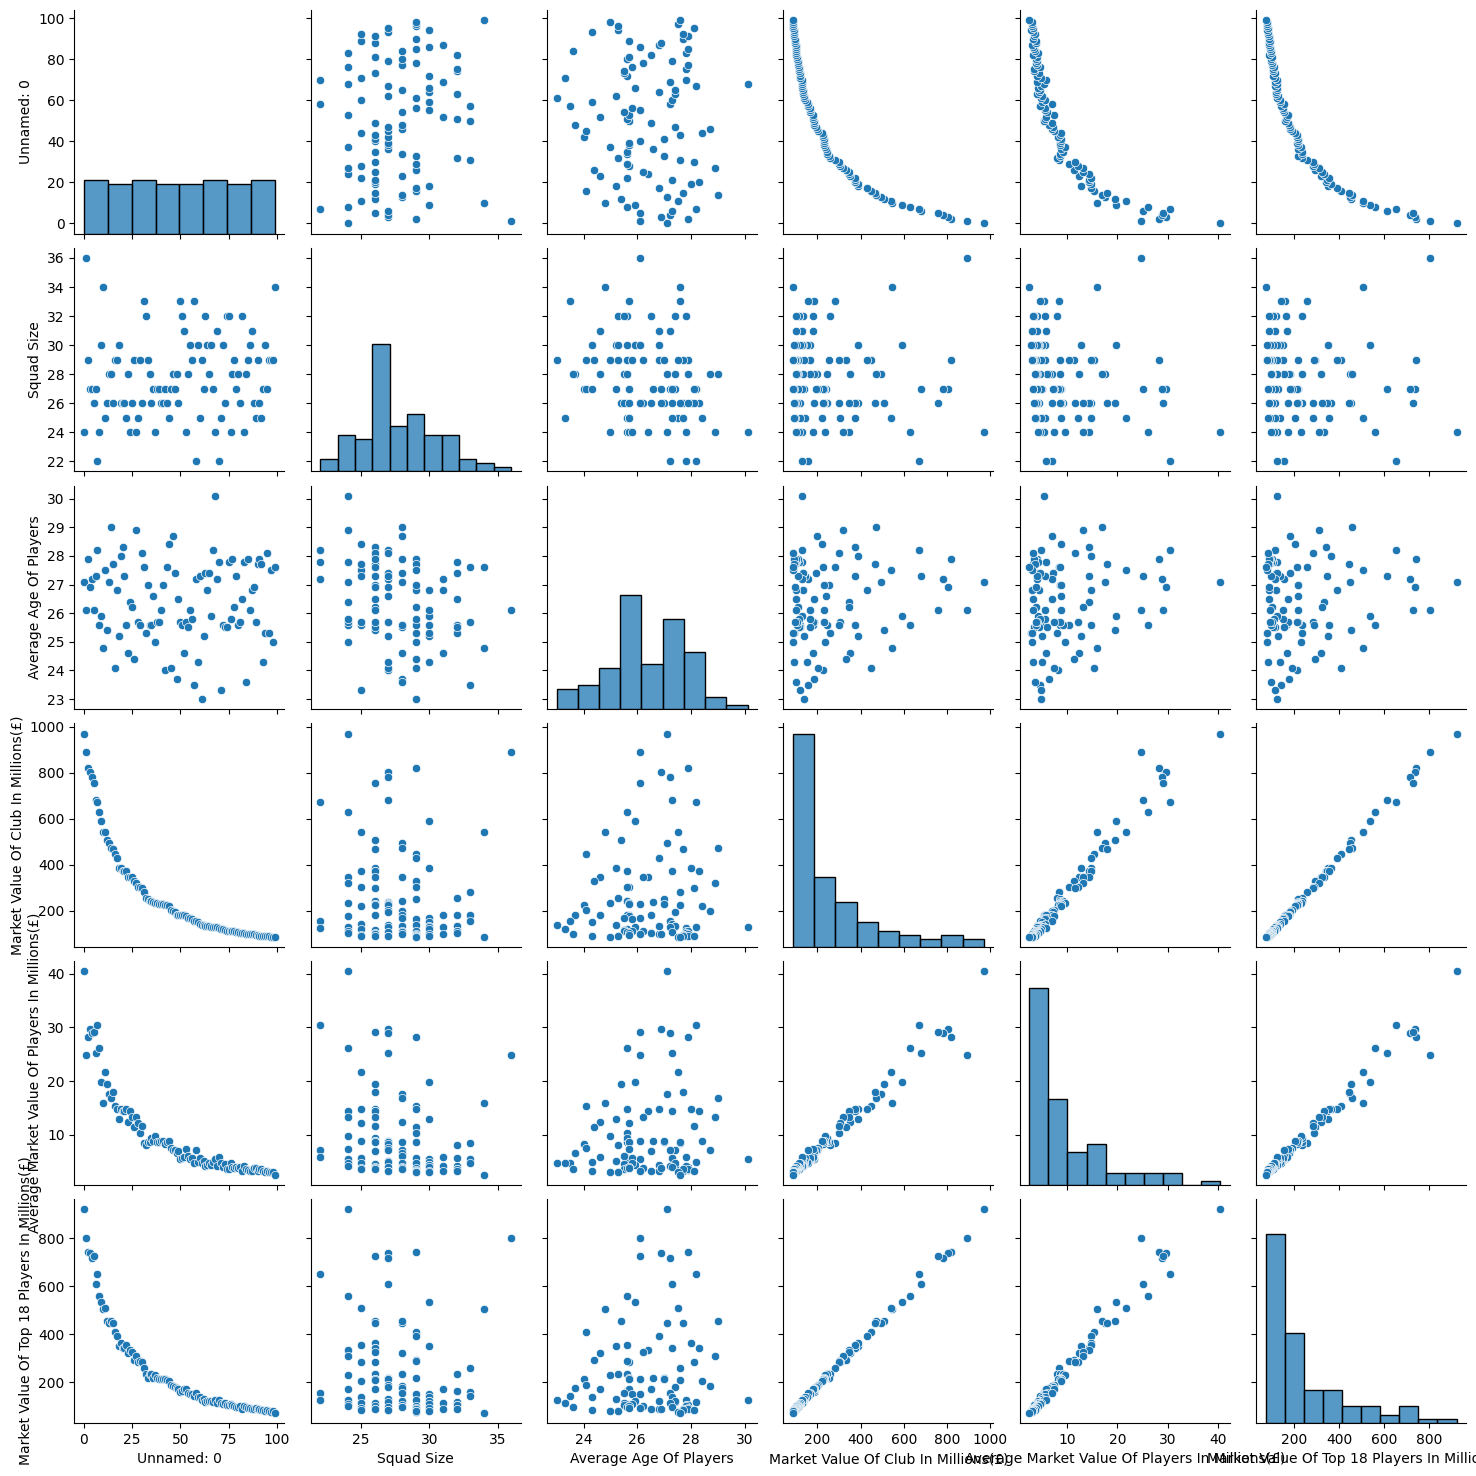

In [ ]:
sns.pairplot(vec);

<h4>DataSet "tj"

In [ ]:
tj = pd.read_csv("../Data/EDA_transferencias_jugadores.csv")
tj.head()

,Pos.,Player,Year,Fee,From Club,To Club
0,1,Neymar,2017,€222m,Barcelona,PSG
1,2,Kylian Mbappe,2017,€145m (+€35m),Monaco,PSG
2,3,Joao Felix,2019,€126m,Benfica,Atletico Madrid
3,4,Enzo Fernandez,2023,€121m,Benfica,Chelsea
4,5,Philippe Coutinho,2018,€120m (+€40m),Liverpool,Barcelona


In [ ]:
tj.tail()

,Pos.,Player,Year,Fee,From Club,To Club
97,90,Victor Osimhen,2020,€50m,Lille,Napoli
98,97,Anthony Martial,2015,€49.3m,Monaco,Manchester United
99,98,Gylfi Sigurdsson,2017,€49.2m,Swansea City,Everton
100,99,Leroy Sane,2020,€49m (+€11m),Manchester City,Bayern Munich
101,99,Christian Vieri,1999,€49m,Lazio,Inter


In [ ]:
tj.dtypes

Pos.          int64
Player       object
Year          int64
Fee          object
From Club    object
To Club      object
dtype: object

In [ ]:
tj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Pos.       102 non-null    int64 
 1   Player     102 non-null    object
 2   Year       102 non-null    int64 
 3   Fee        102 non-null    object
 4   From Club  102 non-null    object
 5   To Club    102 non-null    object
dtypes: int64(2), object(4)
memory usage: 4.9+ KB


In [ ]:
tj.describe()

,Pos.,Year
count,102.000000,102.000000
mean,49.196078,2017.441176
std,28.664339,4.986265
min,1.000000,1999.000000
25%,24.000000,2016.250000
50%,49.500000,2019.000000
75%,74.750000,2020.000000
max,99.000000,2023.000000


In [ ]:
tj.shape

(102, 6)

In [ ]:
tj.columns

Index(['Pos.', 'Player', 'Year', 'Fee', 'From Club', 'To Club'], dtype='object')

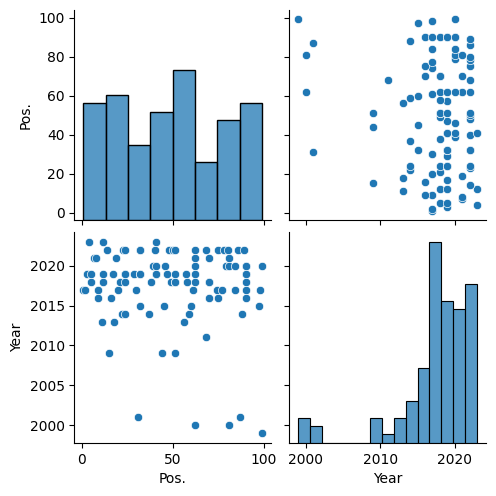

In [ ]:
sns.pairplot(tj);

La siguiente clase permitirá mostrar los DataFrame uno al lado del otro:

In [ ]:
class display(object):
    """Mostrar la representación HTML de varios objetos"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [ ]:
display('edc','vec', "pd.merge(edc, vec)")

TypeError: Can only merge Series or DataFrame objects, a <class 'numpy.ndarray'> was passed

AttributeError: 'numpy.ndarray' object has no attribute '_repr_html_'

In [ ]:

edc = pd.DataFrame({'team': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
